<a href="https://colab.research.google.com/github/ciaoCiao100/Prova1/blob/master/classificatoriDiStelle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!apt-get -qq install -y libfluidsynth1
!pip install matplotlib===3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
import math
from sklearn.ensemble import VotingClassifier
from sklearn import datasets
from itertools import cycle
from sklearn import svm, datasets

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from google.colab import drive




In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def recuperaPerformance(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  precision=0
  recall=0
  f1=0
  accuracy=0
  specifity=0
  for c in range(3):
      tp = cm[c,c]
      fp = sum(cm[:,c]) - cm[c,c]
      fn = sum(cm[c,:]) - cm[c,c]
      tn = sum(np.delete(sum(cm)-cm[c,:],c))
      _precision = tp/(fp+tp)
      _recall = tp/(fn+tp)
      _f1 = (2*_precision*_recall)/(_precision+_recall)
      _accuracy = (tp+tn)/(tn+fp+fn+tp)
      _specifity = tn/(fp+tn)
      _precision = 0 if np.isnan(_precision) else _precision
      _recall = 0 if np.isnan(_recall) else _recall
      _f1 = 0 if np.isnan(_f1) else _f1
      _accuracy = 0 if np.isnan(_accuracy) else _accuracy
      _specifity = 0 if np.isnan(_specifity) else _specifity
      precision = precision+_precision
      recall = recall+_recall
      f1 = f1+_f1
      accuracy = accuracy+_accuracy
      specifity = specifity+_specifity

#print("for class {}: recall {}, specificity {}\
#precision {}, f1 {}".format(c,round(recall,4), round(specificity,4),round(precision,4),round(f1_score,4)))

  return precision/3, recall/3, f1/3, accuracy/3, specifity/3


In [5]:
def plotPerformance(scores, titolo):
  print(scores)
  labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'Specificity']
  DT_value = scores[0]
  NB_value = scores[1]
  SVC_value = scores[2]
  x = np.arange(len(labels))
  width = 0.20
  fig, ax = plt.subplots()
  rectsDT = ax.bar(x - width, DT_value, width, label='DT',color='#7F7F7F')
  rectsNB = ax.bar(x, NB_value, width, label='NB', color='#FE9900')
  rectsSVC = ax.bar(x + width, SVC_value, width, label='SVC',color='#77933C')
  ax.set_ylabel('Misure %')
  ax.set_xticks(x, labels)
  ax.legend()
  ax.bar_label(rectsDT, padding=3, rotation=90)
  ax.bar_label(rectsNB, padding=3, rotation=90)
  ax.bar_label(rectsSVC, padding=3, rotation=90)
  fig.tight_layout()
  plt.legend(loc=(1.04,0))
  plt.title(titolo)
  plt.show()

In [6]:
path = "/content/drive/MyDrive/star_classification.csv"
df= pd.read_csv(path)
df


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [7]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [8]:
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.float32)
df.dtypes

obj_ID         float32
alpha          float32
delta          float32
u              float32
g              float32
r              float32
i              float32
z              float32
run_ID         float32
rerun_ID       float32
cam_col        float32
field_ID       float32
spec_obj_ID    float32
class           object
redshift       float32
plate          float32
MJD            float32
fiber_ID       float32
dtype: object

In [9]:
df['class'].replace(to_replace=['GALAXY','QSO','STAR'], value=[0, 1, 2], inplace=True)
df.rename(columns = {'class':'Class'}, inplace = True)
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,Class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689102,32.494633,23.878820,22.275299,20.395010,19.165730,18.793711,3606.0,301.0,2.0,79.0,6.543778e+18,0,0.634794,5812.0,56354.0,171.0
1,1.237665e+18,144.826096,31.274185,24.777590,22.831881,22.584440,21.168119,21.614269,4518.0,301.0,5.0,119.0,1.176014e+19,0,0.779136,10445.0,58158.0,427.0
2,1.237661e+18,142.188797,35.582443,25.263069,22.663891,20.609760,19.348570,18.948271,3606.0,301.0,2.0,120.0,5.152200e+18,0,0.644194,4576.0,55592.0,299.0
3,1.237663e+18,338.741028,-0.402828,22.136820,23.776560,21.611620,20.504539,19.250099,4192.0,301.0,3.0,214.0,1.030107e+19,0,0.932346,9149.0,58039.0,775.0
4,1.237680e+18,345.282593,21.183867,19.437180,17.580280,16.497471,15.977110,15.544610,8102.0,301.0,3.0,137.0,6.891865e+18,0,0.116123,6121.0,56187.0,842.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620708,-2.594074,22.167589,22.975861,21.904039,21.305479,20.735689,7778.0,301.0,2.0,581.0,1.055431e+19,0,0.000000,9374.0,57749.0,438.0
99996,1.237679e+18,29.493818,19.798874,22.691179,22.386280,20.450029,19.757589,19.415260,7917.0,301.0,1.0,289.0,8.586351e+18,0,0.404895,7626.0,56934.0,866.0
99997,1.237668e+18,224.587402,15.700707,21.169161,19.269970,18.204281,17.690340,17.352209,5314.0,301.0,4.0,308.0,3.112008e+18,0,0.143366,2764.0,54535.0,74.0
99998,1.237661e+18,212.268616,46.660366,25.350389,21.637569,19.913860,19.072540,18.624821,3650.0,301.0,4.0,131.0,7.601079e+18,0,0.455040,6751.0,56368.0,470.0


In [10]:
for col in df:
  print(col + " " + str(len(df[col].unique())))


obj_ID 139
alpha 99688
delta 99872
u 93748
g 92651
r 91901
i 92019
z 92007
run_ID 430
rerun_ID 1
cam_col 6
field_ID 856
spec_obj_ID 97654
Class 3
redshift 99295
plate 6284
MJD 2180
fiber_ID 1000


In [11]:
df.insert(len(df.columns)-1, 'Class', df.pop('Class'))

df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,Class
0,1.237661e+18,135.689102,32.494633,23.878820,22.275299,20.395010,19.165730,18.793711,3606.0,301.0,2.0,79.0,6.543778e+18,0.634794,5812.0,56354.0,171.0,0
1,1.237665e+18,144.826096,31.274185,24.777590,22.831881,22.584440,21.168119,21.614269,4518.0,301.0,5.0,119.0,1.176014e+19,0.779136,10445.0,58158.0,427.0,0
2,1.237661e+18,142.188797,35.582443,25.263069,22.663891,20.609760,19.348570,18.948271,3606.0,301.0,2.0,120.0,5.152200e+18,0.644194,4576.0,55592.0,299.0,0
3,1.237663e+18,338.741028,-0.402828,22.136820,23.776560,21.611620,20.504539,19.250099,4192.0,301.0,3.0,214.0,1.030107e+19,0.932346,9149.0,58039.0,775.0,0
4,1.237680e+18,345.282593,21.183867,19.437180,17.580280,16.497471,15.977110,15.544610,8102.0,301.0,3.0,137.0,6.891865e+18,0.116123,6121.0,56187.0,842.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620708,-2.594074,22.167589,22.975861,21.904039,21.305479,20.735689,7778.0,301.0,2.0,581.0,1.055431e+19,0.000000,9374.0,57749.0,438.0,0
99996,1.237679e+18,29.493818,19.798874,22.691179,22.386280,20.450029,19.757589,19.415260,7917.0,301.0,1.0,289.0,8.586351e+18,0.404895,7626.0,56934.0,866.0,0
99997,1.237668e+18,224.587402,15.700707,21.169161,19.269970,18.204281,17.690340,17.352209,5314.0,301.0,4.0,308.0,3.112008e+18,0.143366,2764.0,54535.0,74.0,0
99998,1.237661e+18,212.268616,46.660366,25.350389,21.637569,19.913860,19.072540,18.624821,3650.0,301.0,4.0,131.0,7.601079e+18,0.455040,6751.0,56368.0,470.0,0


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


[[96.0, 96.0, 96.0, 98.0, 98.0], [20.0, 33.0, 25.0, 73.0, 67.0], [30.0, 40.0, 26.0, 56.00000000000001, 69.0]]


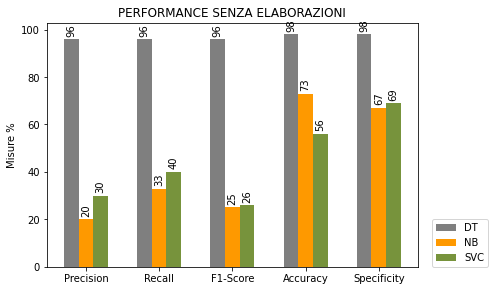

In [12]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
_y_test=y_test.to_numpy()
decisionTree = DecisionTreeClassifier()
naiveBayes = GaussianNB()
svc =  LinearSVC()
#randomForest = RandomForestClassifier(n_estimators=10)

classifiers=[decisionTree, naiveBayes,svc]
#classifiers=[decisionTree, naiveBayes]
scores = []
for classificatore in classifiers:
  classificatore.fit(X_train, y_train)
  y_pred = classificatore.predict(X_test)
  precision, recall, f1, accuracy, specifity = recuperaPerformance(_y_test,y_pred)
  score = []
  score.append(round(precision,2)*100)
  score.append(round(recall,2)*100)
  score.append(round(f1,2)*100)
  score.append(round(accuracy,2)*100)
  score.append(round(specifity,2)*100)
  scores.append(score)
plotPerformance(scores, 'PERFORMANCE SENZA ELABORAZIONI')
